# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
### Before getting started
import sys
import sklearn as sk
print('Python Version: {}.{}.{}'.format(*sys.version_info))
print('Scikit-Learn Version: {}'.format(sk.__version__))

Python Version: 3.5.4
Scikit-Learn Version: 0.19.0


## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import Image

from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


/Users/Michel/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Michel/anaconda/lib/python3.5/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

In [4]:
# Before an answer, I should check the correlation between variables to support my arguments 
# (or to check my intuition about the problem)

# Example from pandas documentation

def color_negative_red(val):
    """
        Takes a scalar and returns a string with
        the css property `'color: red'` for negative
        strings, black otherwise.
    """
    
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

data.corr().style.applymap(color_negative_red)


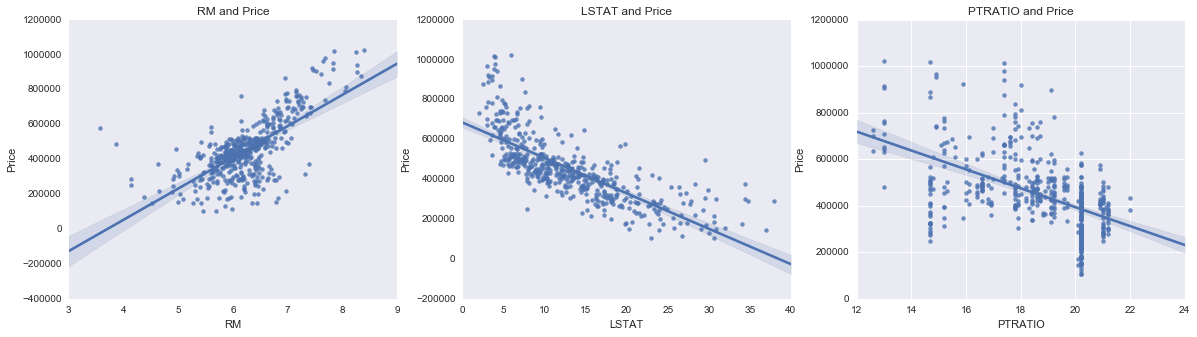

In [5]:
# Reviewer tips

import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(20,5))

for index, feature in enumerate(features.columns):
    plt.grid()
    plt.subplot(1,3,index+1)
    sb.regplot(data[feature], prices,'.')
    plt.title(feature + ' and Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    
plt.grid(True)    

**Answer: **

Number of Rooms (RM)

I expect that the increase of RM will increase the value of the house as well. Generally, a house with more rooms is a bigger house, and more expensive. As we can check on the correlation matrix above, we have a positive correlation (and I would say a strong correlation, correct me if I am wrong) between the number of rooms and the final price.
    
Percentage of homeowners in the neighborhood considered "lower class" (LSTAT)

A neighborhood with bigger LSTAT will have a lower price. I supposed that the house with a big LSTAT is located in a poor neighborhood, where other indicators(violence rate, pollution and other ones maybe) are high. The correlation matrix support this thought.

Ratio of students to teachers in primary and secondary schools (PTRATIO)

After some research on google, I confirmed what I have suspected: As the size of the class increases, we have a decrease in education quality. From the correlation matrix, this is coherent to this thought. Considering that, the can expect that a house with lower PTRATIO will have a bigger price. Thus a house with PTRATIO of 10 would be worth than a house with PTRATIO of 15.


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [6]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [7]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

By definition of coefficient of determination $R^2$ (https://en.wikipedia.org/wiki/Coefficient_of_determination), as the predictions of the estimator gets closer to the real values, the higher is the value of $R^2$ coefficient. According to the score (92.3%), this model is suitable for our regression analysis, since it successfully captured the variation of the target variable. Since the optimal score we can have is 1, the $R^2$ coefficient we got could be considered good.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,random_state=0,test_size=0.2)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

When we develop a predictive model, we are aiming to predict data we have never seen before, so it is expected that we must verify the performance of our model on unseen data. We can do this spliting our dataset into training set and test set, where during the training phase, we "evaluate" how well our model "has learned" from data, and we test its performance on test set. If we train the model using all available data and test our model on the same set, we cannot garantee the model can generalize well data, since it will predict the data correctly. It is not learning.



----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

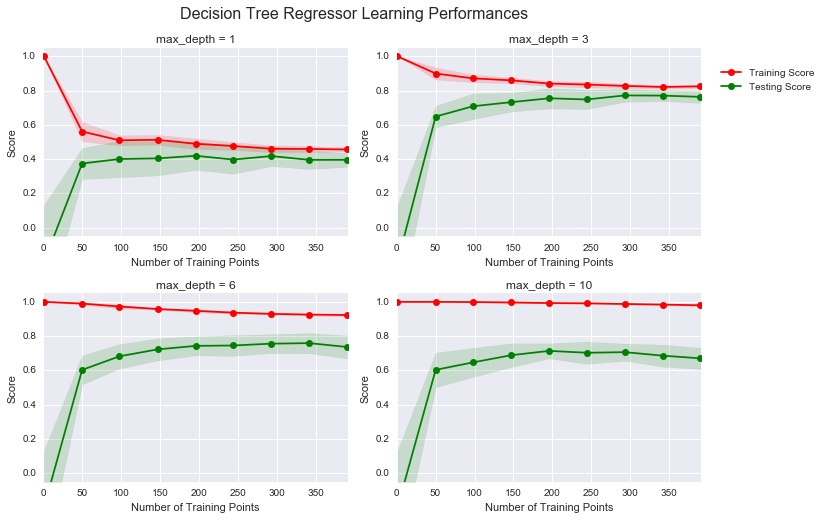

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

<b> Considerations about the models </b>

The Decision Tree Regressor with max_depth of 3 has the best testing score when compared to the other models. We expect that, since we know the performance of the model worses as the increase the complexity of the model, resulting in overfitting of the model.

Looking at the first model with max_depth of 1 and both training and testing scores, one can state that the model is too simple comparing to the other ones. In this case, we could state the model is underfitted.

<b> Considerations about the number of training points </b>

Generally, if we have more data to represent our problem, more are the chances to train a model that generalizes well on unseen data, since the we have more samples from the probability distribution of the problem, leading to a higher training and testing scores. However, as observed above, increasing the number of examples does not change the testing score significatively.

<b> About the hint </b>

One of the data scientist's desires is to have plenty of data available, however we must remember that depending on the problem we are facing, data is expensive to collect. If we create a model with satisfactory training and testing scores with less data, this model will be preferred.

In our case, the Decision Tree Regressor with max_depth of 3 has no significant score difference when using 250 training points or 400, then we can pick the trained model with less training points.

Answering the questions above:

#### What happens to the score of the training curve as more training points are added? What about the testing curve?
 
Generally, the more training points we add to our model, the better the training score we get. The model with more training examples can generalize better, since it has a better representation of the problem. As expected, the testing score will increase as we get more examples.
 
#### Would having more training points benefit the model? 
 
Generally, if we have more data to represent our problem, more are the chances to train a model that generalizes well on unseen data, since the we have more samples from the probability distribution of the problem. However, as we can check on the learning curves graphs, the testing score does not improve considerably. The learning curve tell us that we don't improve significantly our model using more training points. In the case of max_depth = 3, the testing score of our model won't get any benefit using more than 200 training points.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

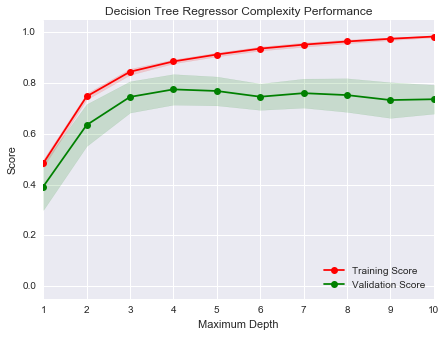

In [10]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

### Answer:

#### When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
 
 The model when trained with a maximum depth of 1 suffers from high bias. The evidence we have for this statement is its poor performance when compared to the models with different hyperparameters. Moreover, from the theory we know that a simple model cannot capture well all the important informations from data. We have some indications on the graphs (above and below) to support the thought that the model with hyperparameter depth = 1 suffers from high bias.
 
 1 - We have a poor performance/score when compared to the other models <br>
 2 - The shaded green area( representing the standard deviation of scores) in testing set is higher than the other models.
 
The model with max_depth of 1 is not a well suited for our problem. This model has a high bias, and the model does not generalize well the for unseen data.

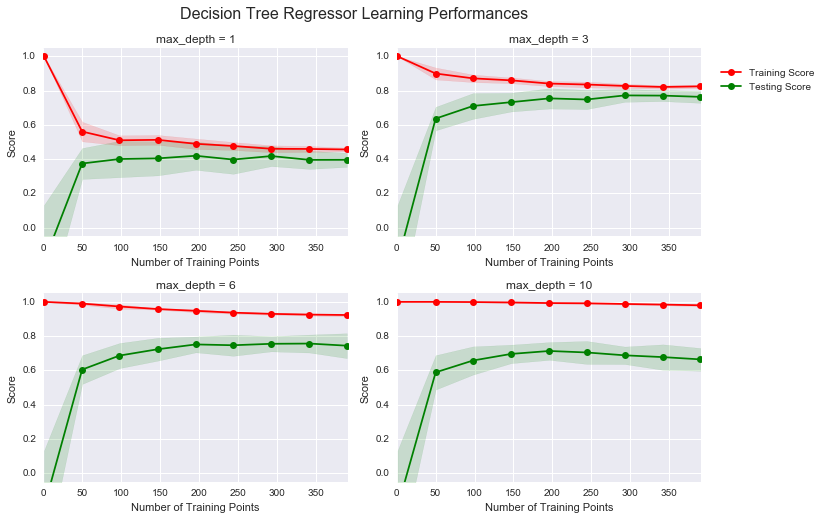

In [11]:
# Showing again for comparison
vs.ModelLearning(features, prices)

#### How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions? 
 
 As we increase the complexity of a model, we have to pay attention to its performance, since the model can overfit if it gets too much complex. We have some indications in both graphs (generated by functions ModelLearning and ModelComplexity) showing that the model with hyperparameter of depth = 10 is overfitted. Looking at both graphs, we can see the testing score decreasing as we increase the depth of the model. This indicate us the model has more parameters than necessary to explain data.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

### Answer:

#### Which maximum depth do you think results in a model that best generalizes to unseen data?

The model with max_depth of 4 has the best validation score. According to Occam's Razor principle, I would choose this model, since it is not too complex and has the best score.

#### What intuition lead you to this answer?

The validation score values on the graph.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

 - What is the grid search technique?
 
 The grid search technique is simply an exhaustive search for the best model, where we give a table of possible parameters and we compare the performance of the model for those parameters. For the chosen model, we pick the parameter with the best performance score.
 
 
 - How it can be applied to optimize a learning algorithm?
 
 An application of this technique can be seen in this project: Which depth has the best training score and validation score? We sweeped from max_depth = 1 to 10 in order to check the best parameter for our problem and we stated that the best model is the regression tree with maximum depth of 4.
 
 

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

### Answer:

#### What is the k-fold cross-validation training technique? 

In K-Fold Cross-Validation technique, we split our training set into <i>K</i> boxes, or folds. One of the boxes will be used as validation set, and the 'k-1' remaining boxes will be used as training set. In each round(of k rounds), we use one of K boxes as our validation set, and the remaning 'k-1' boxes to train the model. After k rounds, we will have k trained models with k different scores. Then, the score of the final model is an average of k existing models.

When using the Kfold method from sklearn, we can choose to split our data sequentially or randomly, changing the value from the variable random_state.

#### What benefit does this technique provide for grid search when optimizing a model?
 
The grid search help us to choose the best model from a family of models(differing from each other on their parameters). We use the K-fold Cross-Validation for assessment of the models for each parameter. In order to find the best parameter, we use a two-step cross-validation process, where, in the first step, we split the data in test set and training set. The training set is used for model selection. 
 
After choosing the training set, we follow the K-fold cross-validation process for each parameter, as described before. Each K fold in the K-Fold CV process is a validation set of the model, while the k-1 folds are the training set for model training with the specified parameter. After the assessment of the scores for all parameters in the grid, we choose the parameter with the best performance on the chosen metric. The next step is to use the entire training set defined before as the training set for the model using the chosen parameter, and the model will be evaluated on the test set.
 
It is important to say that the process described above is used to create a better model than using the training/test split strategy only. Using only a subset of the data set as training set, we could get a lot of bad examples in our training set (outliers, wrong labels, poor data) or the data inside the training set is not a good representation of the entire data set, leading to a creation of a poor model. Using Cross-Validation strategy, we make sure that our estimator is more robust to the training/test split strategy alone.

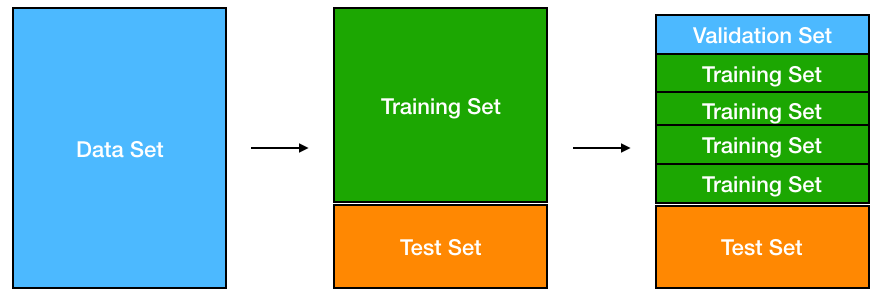

In [13]:
# First step: Search of the best hyperparameter 
Image(filename='/Users/Michel/Desktop/CV1.png')

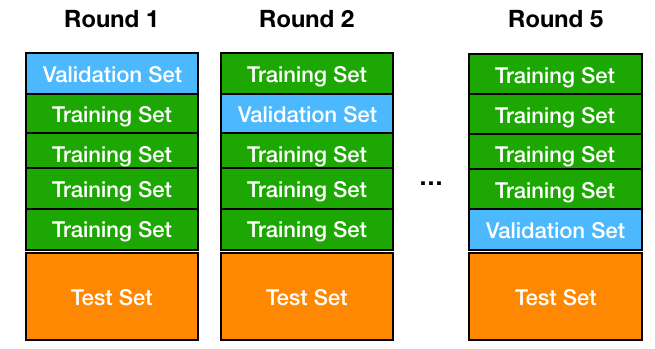

In [15]:
# The K-Fold Cross-Validation process to choose the best parameter(for K=5)
Image(filename='/Users/Michel/Desktop/CV2.png')

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [66]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer



def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.19: ShuffleSplit(n_splits=10, test_size=’default’, train_size=None, random_state=None) *****
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    
    # Number of folds I wish
    k_folds = 10
    
    cv_sets = ShuffleSplit(n_splits=k_folds, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    performance_metric = r2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [67]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

The optimal model has max_depth of 4. It is the same answer of question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [68]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


In [69]:
# Information about each feature in dataset
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


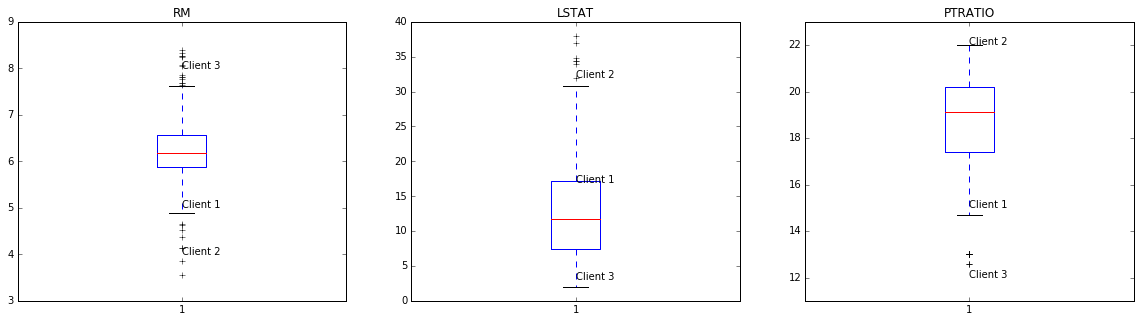

In [70]:
# Some boxplots for each feature
# Inspired by reviewer's comments 

plt.figure(figsize=(20,5))
plt.grid(True)
y_ax = [[3,9],[0,40],[11,23]]

for index, feature in enumerate(features.columns):
    plt.subplot(1,3,index+1)
    plt.boxplot(features[feature])
    plt.title(feature)
    
    for feature_index in range(3):
        plt.plot(1,client_data[feature_index][index])
        plt.annotate('Client ' + str(feature_index+1), xy=(1,client_data[feature_index][index]))
        plt.ylim(y_ax[index])

## Answer:

### What price would you recommend each client sell his/her home at?

The predicted prices are: 

    - $391,183.33 for client 1, 
- $189,123.53 for client 2 and 
    - $942,666.67 for client 3.

### Do these prices seem reasonable given the values for the respective features?

As discussed before, low LSTAT and low PTRATIO increases the price of a house, as well as a high number of rooms. The selling prince for client 3 will be the highest price among the clients for sure. Between client 1 and client 2, we expect the price for client 1 higher than client 2, since RM is higher and LSTAT and PTRATIO are lower for client 1. 

#### Investigating Client 3

According to the box-and-whisker plot above, the number of rooms is an outlier comparing to other houses, probably a really big house(since we are not considering the square feet here). Verifying the prince of other houses with a close RM value:

In [71]:
client3 = data[data['RM'] >= 7.5]
client3.head()

,RM,LSTAT,PTRATIO,MEDV
97,8.069,4.21,18.0,812700.0
98,7.820,3.57,18.0,919800.0
176,7.765,7.56,17.8,835800.0
196,7.610,3.11,14.7,888300.0
197,7.853,3.81,14.7,1018500.0


In [72]:
# Number of houses w/ RM > 7.5
print('Number of houses for RM > 7.5: {}'.format(client3.shape[0]))

# Mean prices for RM > 7.5
print('Mean prices for RM > 7.5: ${}'.format(np.mean(client3['MEDV'])))

# Mean values for LSTAT and PTRATIO
print('Mean LSTAT for RM > 7.5: {}'.format(np.mean(client3['LSTAT'])))
print('Mean PTRATIO for RM > 7.5: {}'.format(np.mean(client3['PTRATIO'])))

Number of houses for RM > 7.5: 16
Mean prices for RM > 7.5: $910218.75
Mean LSTAT for RM > 7.5: 4.370625
Mean PTRATIO for RM > 7.5: 16.48125


For client 3, the selling price is reasonable. It is close to the mean for RM about 8, and the LSTAT and PTRATIO lower than the mean value found above can explain the price difference.

#### Client 2

According to the boxplots, all the features of client 2 are outliers. RM is low and the other ones are high, meaning that the price is probably lower than the average of houses with RM ~ 4.

In [73]:
client2 = data[data['RM'] < 5]
client2.head()

,RM,LSTAT,PTRATIO,MEDV
144,4.903,29.29,14.7,247800.0
147,4.926,29.53,14.7,306600.0
299,4.973,12.64,18.4,338100.0
353,3.561,7.12,20.2,577500.0
354,4.963,14.00,20.2,459900.0


In [74]:
# Number of houses w/ RM < 5
print('Number of houses for RM < 5: {}'.format(client2.shape[0]))

Number of houses for RM < 5: 14


In [75]:
# Getting the houses with LSTAT higher than 30
client2_LSTAT = client2[client2['LSTAT'] > 30]
print('Number of houses with RM < 5 and LSTAT > 30: {}'.format(client2_LSTAT.shape[0]))

Number of houses with RM < 5 and LSTAT > 30: 6


In [76]:
client2_LSTAT.head(6)

,RM,LSTAT,PTRATIO,MEDV
356,4.906,34.77,20.2,289800.0
357,4.138,37.97,20.2,289800.0
367,4.368,30.63,20.2,184800.0
371,4.880,30.62,20.2,214200.0
395,4.628,34.37,20.2,375900.0
397,4.519,36.98,20.2,147000.0


In [77]:
np.mean(client2_LSTAT['MEDV'])

250250.0

As the table above shows, the index 367 seems to be an outlier. Probably, the features used in our model cannot fully represent the price of the house, and other factors make its price lower than the mean. I would say the price we got for client 2 is wrong, since it is almost half of the mean price when compared with close RM values.

#### Client 1

Finally, let's check the prices for client 1.

In [78]:
client1 = data[(data['RM'] > 4.8) & (data['RM'] < 5.2)]
client1.head(15)

,RM,LSTAT,PTRATIO,MEDV
141,5.019,34.41,21.2,302400.0
144,4.903,29.29,14.7,247800.0
147,4.926,29.53,14.7,306600.0
148,5.186,28.32,14.7,373800.0
152,5.012,12.12,14.7,321300.0
299,4.973,12.64,18.4,338100.0
354,4.963,14.00,20.2,459900.0
356,4.906,34.77,20.2,289800.0
370,5.000,31.99,20.2,155400.0
371,4.880,30.62,20.2,214200.0


In [79]:
# How many houses
print('Number of houses with RM between 4.8 and 5.2: {}'.format(client1.shape[0]))

Number of houses with RM between 4.8 and 5.2: 13


In [80]:
client1 = client1[(client1['LSTAT'] > 12) & (client1['LSTAT'] < 18)]
client1.head()

,RM,LSTAT,PTRATIO,MEDV
152,5.012,12.12,14.7,321300.0
299,4.973,12.64,18.4,338100.0
354,4.963,14.00,20.2,459900.0


The prices close to client 1 feature values are a bit far from the predicted($391.183,33). The example with index of 152 has the value of $321.300,00. It is the closest value we have for the feature values of client 1. Comparing with the dataset we have, the prediction for client 1 is not good.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [81]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


I created another function based on PredictTrial to get a better opinion about the range in prices obtained using the model.     

In [82]:
def PredictTrials_2(X, y, fitter, data,number_of_runs=10):
    """ Performs trials of fitting and predicting data. """

    #/ Store the predicted prices
    prices = []

    number_of_runs = int(number_of_runs)
    
    for k in range(number_of_runs):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        #/ Fit the data
        reg = fitter(X_train, y_train)
        
        #/ Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)

    return prices

In [83]:
# Running the model 100 times and getting some insight for sensitivity
values =  PredictTrials_2(features, prices, fit_model, client_data,number_of_runs=100)

In [84]:
# From the values of 100 runs
print('The range of prices in 100 runs: ${:,.2f}'.format(np.max(values) - np.min(values)))

The range of prices in 100 runs: $126,437.50


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:

- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

- How relevant today is data that was collected from 1978? 
   
  The historical data can show us how the prices changed over the years. The change of the prices could tell us about the history of the place where the the house is located at, its development , and could tell us about the future of the neighborhood where the house is located at.
  

- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?

  There are no sufficient features present in the data to describe well a home. There are another features (and I would say better indicators than the used ones during the project) that can influence more the price of the house than the 3 features used. Indicators like violence rate in the neighborhood could influence more than the LSTAT or PTRATIO(my opinion). Another relevant feature is if the house has public transport access nearby. Of course, the square feet of the plot area and presence of pool in the house could should factor in during the choice of the home.
  
  
- Is the model robust enough to make consistent predictions?

  I don't believe the model is robust using only 3 features. There are another features mentioned before that can improve the model and change the prices. Using the values above we can observe how sensitive is the model, as the range of values(~70K on 10 runs and ~120K on 100 runs) is a considerable variation when talking about buying a house. I would say this model is not suitable to predict the price of a house.
  
  
- Would data collected in an urban city like Boston be applicable in a rural city?

  I don't think it is possible ou plausible, since we have different characteristics in urban and rural environments.
  
  
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

  It is difficult to judge that. A small house should not be expensive just because of low LSTAT and low PTRATIO, however a house in this context probably is located in a place with easy public transportation access, with plenty of stores nearby. On the other hand, a house with high RM , not so high LSTAT and PTRATIO , could be placed in a very violent neighborhood, and its price would not be consistent with the feature values proposed by the model.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.